In [32]:
import yfinance as yf
import pandas as pd

def fetch_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Fetch Bitcoin data from January 1, 2021, to December 31, 2021
btc_data = fetch_data('BTC-USD', '2021-01-01', '2021-12-31')
print(btc_data.head())


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  31971.914062   
2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   

               Adj Close       Volume  
Date                                   
2021-01-01  29374.152344  40730301359  
2021-01-02  32127.267578  67865420765  
2021-01-03  32782.023438  78665235202  
2021-01-04  31971.914062  81163475344  
2021-01-05  33992.429688  67547324782  


In [33]:
import ta

def calculate_technical_indicators(data):
    # Calculate Exponential Moving Average (EMA)
    data['EMA_12'] = ta.trend.ema_indicator(close=data['Close'], window=12)
    data['EMA_26'] = ta.trend.ema_indicator(close=data['Close'], window=26)
    
    # Calculate Moving Average Convergence Divergence (MACD)
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    
    return data

btc_data = calculate_technical_indicators(btc_data)
print(btc_data.head())


                    Open          High           Low         Close  \
Date                                                                 
2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  31971.914062   
2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   

               Adj Close       Volume  EMA_12  EMA_26  MACD  MACD_Signal  \
Date                                                                       
2021-01-01  29374.152344  40730301359     NaN     NaN   NaN          NaN   
2021-01-02  32127.267578  67865420765     NaN     NaN   NaN          NaN   
2021-01-03  32782.023438  78665235202     NaN     NaN   NaN          NaN   
2021-01-04  31971.914062  81163475344     NaN     NaN   NaN          NaN   
2021-01-05  33992.429688  67547324782     NaN     NaN

In [34]:
from sklearn.preprocessing import MinMaxScaler

def preprocess_data(data):
    # Fill missing values using forward and backward filling
    data.ffill(inplace=True)
    data.bfill(inplace=True)
    
    # Normalize the data
    scaler = MinMaxScaler()
    data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']] = scaler.fit_transform(
        data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    )
    
    return data

btc_data = preprocess_data(btc_data)
print(btc_data.head())


                    Open          High           Low     Close     Adj Close  \
Date                                                                           
2021-01-01  28994.009766  29600.626953  28803.585938  0.000000  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  0.072085  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  0.089228  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  0.068017  31971.914062   
2021-01-05  31977.041016  34437.589844  30221.187500  0.120920  33992.429688   

                 Volume   EMA_12    EMA_26      MACD  MACD_Signal  MACD_Diff  
Date                                                                          
2021-01-01  40730301359  0.10664  0.028039  0.477993     0.495041   0.678471  
2021-01-02  67865420765  0.10664  0.028039  0.477993     0.495041   0.678471  
2021-01-03  78665235202  0.10664  0.028039  0.477993     0.495041   0.678471  
2021-01-04  81163475344  0.10664  0.028039  

In [35]:
import yfinance as yf
import pandas as pd
import ta
from sklearn.preprocessing import MinMaxScaler

def fetch_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

def calculate_technical_indicators(data):
    # Calculate Exponential Moving Average (EMA)
    data['EMA_12'] = ta.trend.ema_indicator(close=data['Close'], window=12)
    data['EMA_26'] = ta.trend.ema_indicator(close=data['Close'], window=26)
    
    # Calculate Moving Average Convergence Divergence (MACD)
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    
    return data

def preprocess_data(data):
    # Fill missing values
    data.ffill(inplace=True)
    data.bfill(inplace=True)
    
    # Normalize the data
    scaler = MinMaxScaler()
    data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']] = scaler.fit_transform(
        data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    )
    
    return data

# Fetch, calculate indicators, and preprocess data
btc_data = fetch_data('BTC-USD', '2021-01-01', '2021-12-31')
btc_data = calculate_technical_indicators(btc_data)
btc_data = preprocess_data(btc_data)

# Display the processed data
print(btc_data.head())


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low     Close     Adj Close  \
Date                                                                           
2021-01-01  28994.009766  29600.626953  28803.585938  0.000000  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  0.072085  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  0.089228  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  0.068017  31971.914062   
2021-01-05  31977.041016  34437.589844  30221.187500  0.120920  33992.429688   

                 Volume   EMA_12    EMA_26      MACD  MACD_Signal  MACD_Diff  
Date                                                                          
2021-01-01  40730301359  0.10664  0.028039  0.477993     0.495041   0.678471  
2021-01-02  67865420765  0.10664  0.028039  0.477993     0.495041   0.678471  
2021-01-03  78665235202  0.10664  0.028039  0.477993     0.495041   0.678471  
2021-01-04  81163475344  0.10664  0.028039  

[*********************100%%**********************]  1 of 1 completed


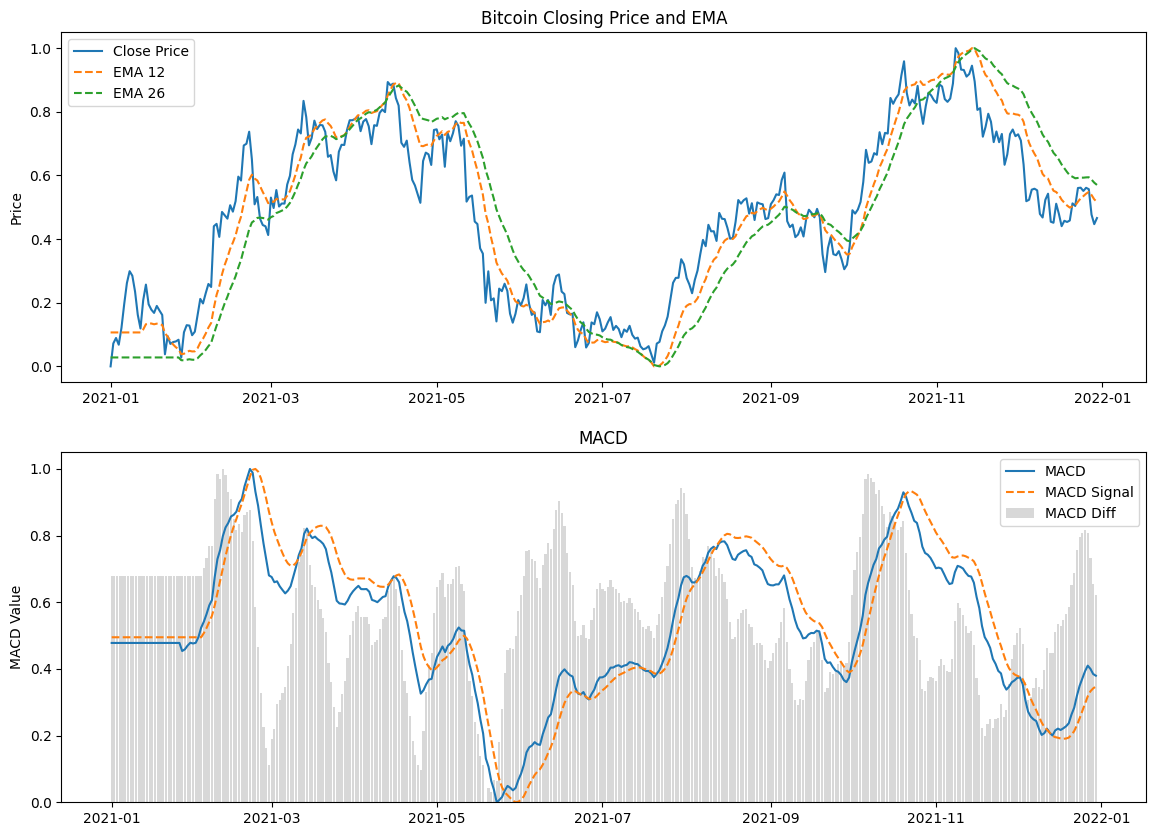

In [36]:
import yfinance as yf
import pandas as pd
import ta
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def fetch_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

def calculate_technical_indicators(data):
    # Calculate Exponential Moving Average (EMA)
    data['EMA_12'] = ta.trend.ema_indicator(close=data['Close'], window=12)
    data['EMA_26'] = ta.trend.ema_indicator(close=data['Close'], window=26)
    
    # Calculate Moving Average Convergence Divergence (MACD)
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    
    return data

def preprocess_data(data):
    # Fill missing values
    data.ffill(inplace=True)
    data.bfill(inplace=True)
    
    # Normalize the data
    scaler = MinMaxScaler()
    data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']] = scaler.fit_transform(
        data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    )
    
    return data

def plot_data(data):
    fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 10))

    # Plot the closing price along with EMA
    ax1.set_title('Bitcoin Closing Price and EMA')
    ax1.plot(data.index, data['Close'], label='Close Price')
    ax1.plot(data.index, data['EMA_12'], label='EMA 12', linestyle='--')
    ax1.plot(data.index, data['EMA_26'], label='EMA 26', linestyle='--')
    ax1.set_ylabel('Price')
    ax1.legend()

    # Plot MACD, MACD Signal, and MACD Diff
    ax2.set_title('MACD')
    ax2.plot(data.index, data['MACD'], label='MACD')
    ax2.plot(data.index, data['MACD_Signal'], label='MACD Signal', linestyle='--')
    ax2.bar(data.index, data['MACD_Diff'], label='MACD Diff', color='gray', alpha=0.3)
    ax2.set_ylabel('MACD Value')
    ax2.legend()

    plt.show()

# Fetch, calculate indicators, and preprocess data
btc_data = fetch_data('BTC-USD', '2021-01-01', '2021-12-31')
btc_data = calculate_technical_indicators(btc_data)
btc_data = preprocess_data(btc_data)

# Plot the processed data
plot_data(btc_data)


[*********************100%%**********************]  1 of 1 completed


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Training Results:
MAE: 0.014286582793513684
RMSE: 0.021410671913726396
R2 Score: 0.9931034629749906

Testing Results:
MAE: 0.030794267944690902
RMSE: 0.043575690402613367
R2 Score: 0.9695393180358892


/Users/ameyakulkarni/Desktop/College/Placement/Python/pythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/ameyakulkarni/Desktop/College/Placement/Python/pythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


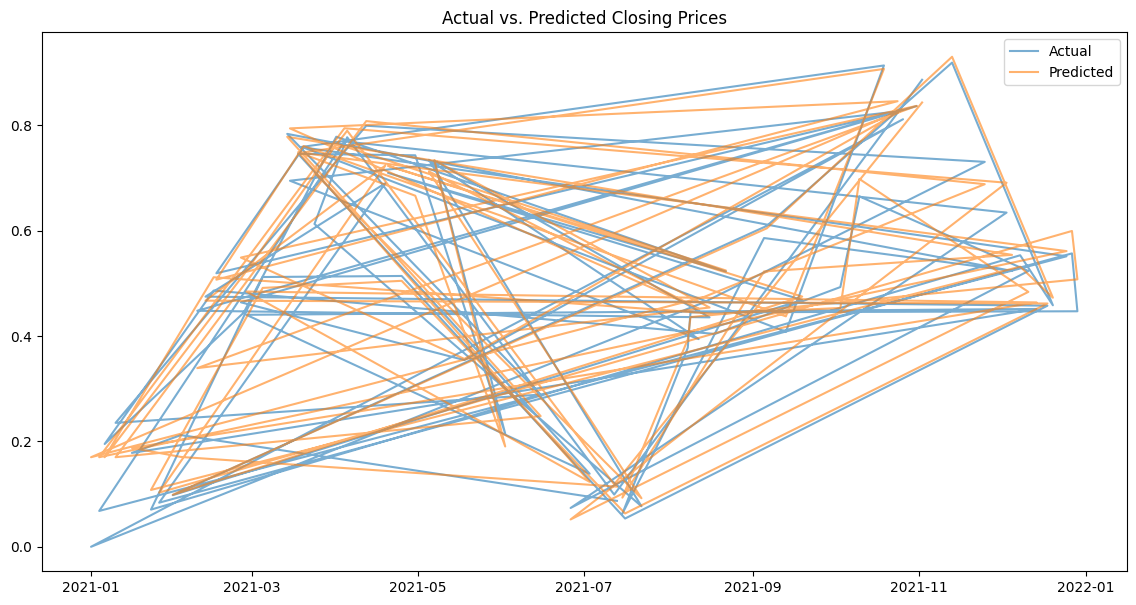

In [37]:
import yfinance as yf
import pandas as pd
import ta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Fetch data
def fetch_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Calculate technical indicators
def calculate_technical_indicators(data):
    data['EMA_12'] = ta.trend.ema_indicator(close=data['Close'], window=12)
    data['EMA_26'] = ta.trend.ema_indicator(close=data['Close'], window=26)
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    return data

# Preprocess data
def preprocess_data(data):
    data.ffill(inplace=True)
    data.bfill(inplace=True)
    scaler = MinMaxScaler()
    data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']] = scaler.fit_transform(
        data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    )
    return data

# Train and evaluate XGBoost model
def train_evaluate_model(data):
    X = data[['EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    y = data['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = xgb.XGBRegressor(objective='reg:squarederror')
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1]
    }
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    print("Training Results:")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train)}")
    print(f"RMSE: {mean_squared_error(y_train, y_pred_train, squared=False)}")
    print(f"R2 Score: {r2_score(y_train, y_pred_train)}")
    print("\nTesting Results:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test)}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred_test, squared=False)}")
    print(f"R2 Score: {r2_score(y_test, y_pred_test)}")
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.index, y_test, label='Actual', alpha=0.6)
    plt.plot(y_test.index, y_pred_test, label='Predicted', alpha=0.6)
    plt.title('Actual vs. Predicted Closing Prices')
    plt.legend()
    plt.show()

btc_data = fetch_data('BTC-USD', '2021-01-01', '2021-12-31')
btc_data = calculate_technical_indicators(btc_data)
btc_data = preprocess_data(btc_data)
train_evaluate_model(btc_data)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning

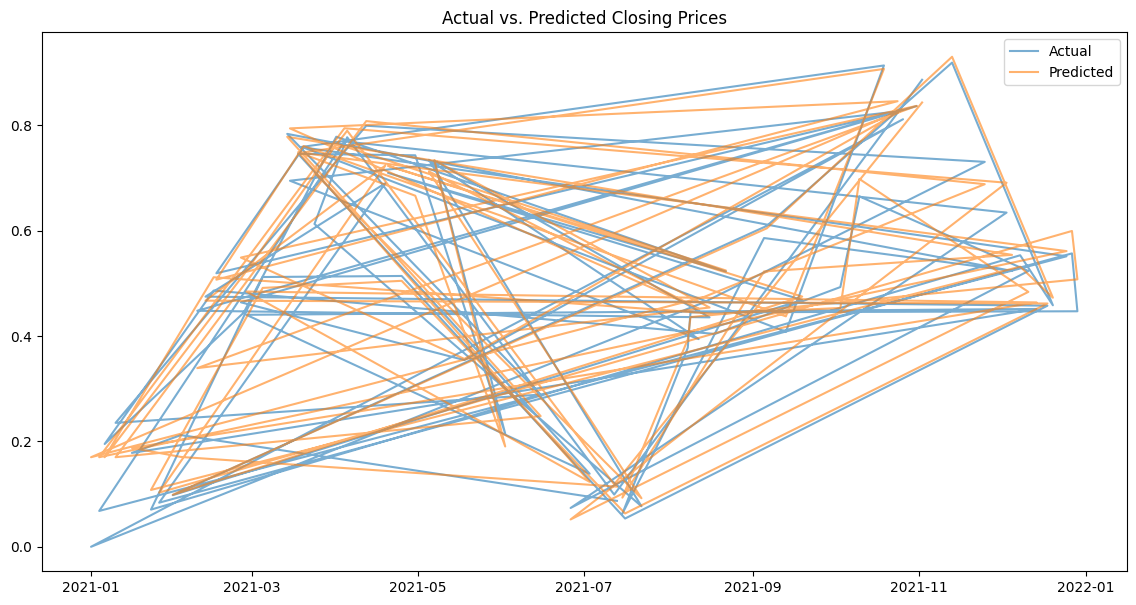

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are defined from your previous script

# Train and evaluate XGBoost model
def train_evaluate_model(data):
    X = data[['EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    y = data['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = xgb.XGBRegressor(objective='reg:squarederror')
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1]
    }
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Evaluate model performance
    print("Training Results:")
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    print(f"MAE: {mae_train}")
    print(f"R2 Score: {r2_train}")

    print("\nTesting Results:")
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    print(f"MAE: {mae_test}")
    print(f"R2 Score: {r2_test}")

    # Plot actual vs. predicted values
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.index, y_test, label='Actual', alpha=0.6)
    plt.plot(y_test.index, y_pred_test, label='Predicted', alpha=0.6)
    plt.title('Actual vs. Predicted Closing Prices')
    plt.legend()
    plt.show()

# Assuming btc_data is prepared as in your previous script
train_evaluate_model(btc_data)


In [39]:
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are defined from your previous script

# Train and evaluate XGBoost model
def train_evaluate_model(data):
    X = data[['EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    y = data['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = xgb.XGBRegressor(objective='reg:squarederror')
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1]
    }
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Calculate MSE
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Print MSE results
    print("Mean Squared Error (MSE) Results:")
    print(f"Training MSE: {mse_train}")
    print(f"Testing MSE: {mse_test}")

# Assuming btc_data is prepared as in your previous script
train_evaluate_model(btc_data)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Training Results:
MAE: 0.014286582793513693
R2 Score: 0.9931034629749906

Testing Results:
MAE: 0.03079426794469088
R2 Score: 0.9695393180358893


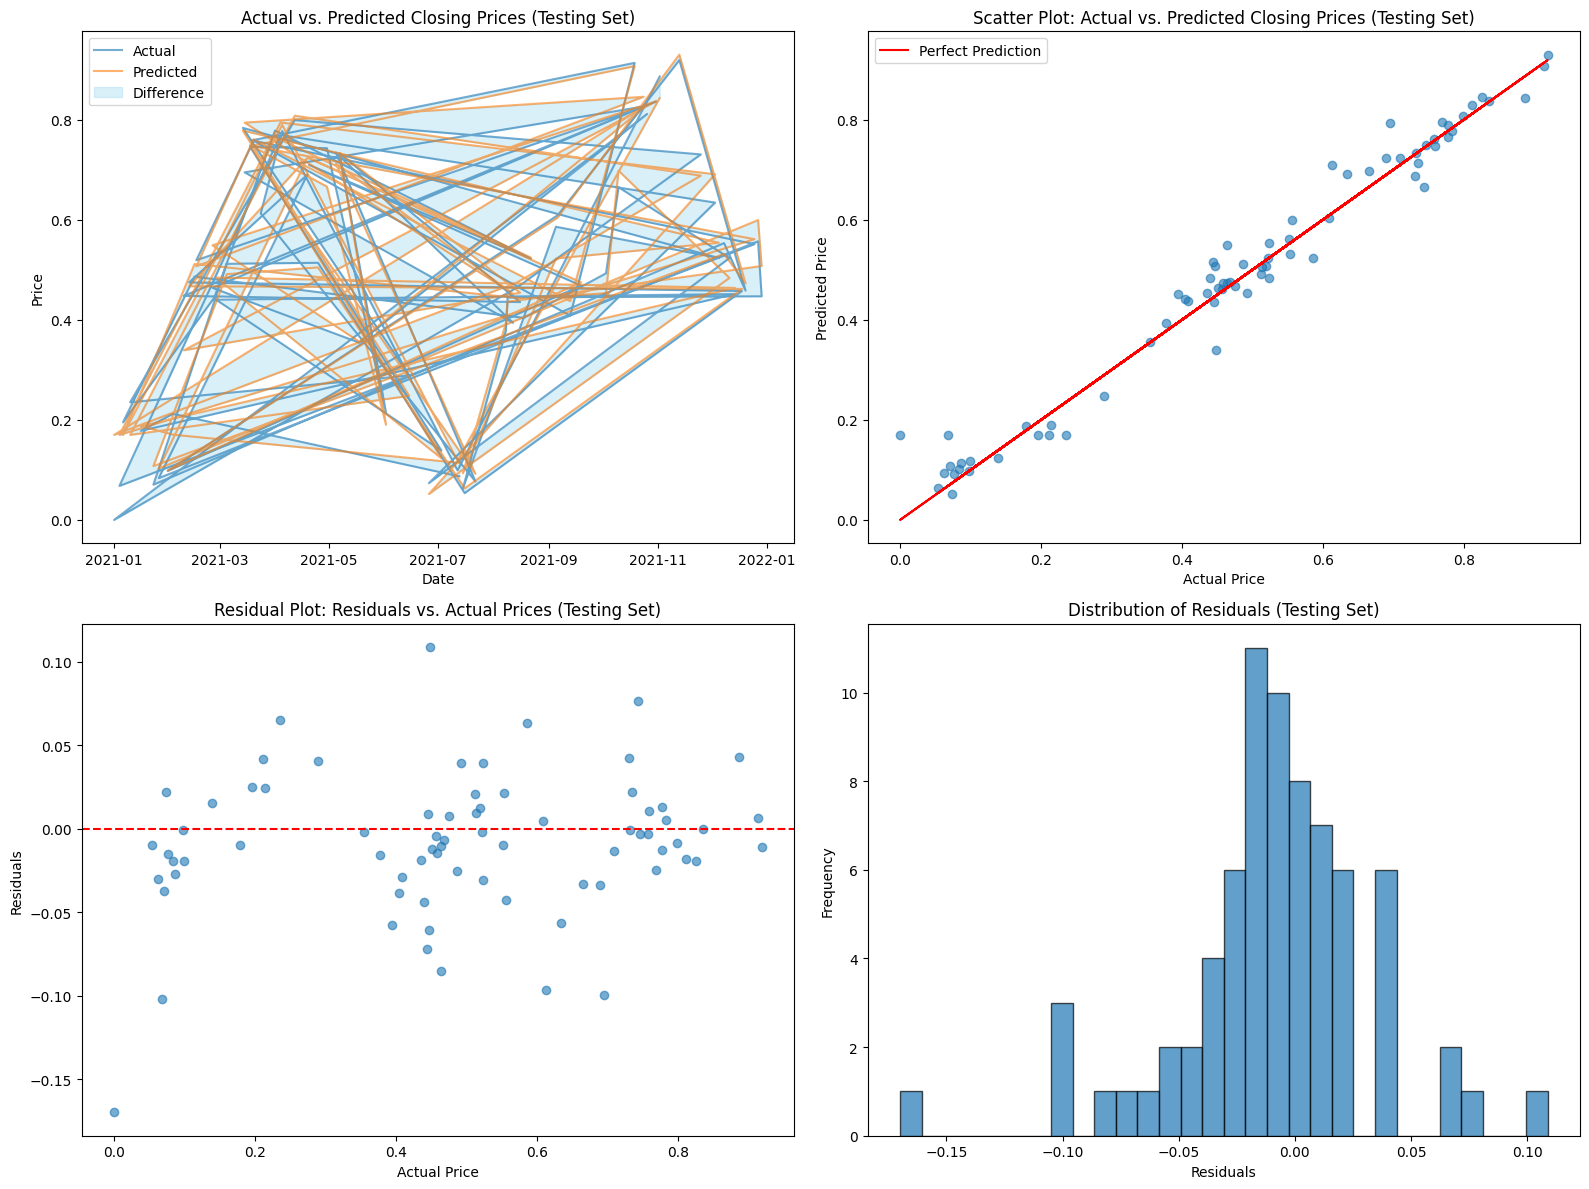

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

# Assuming btc_data is prepared and includes 'Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff'

def preprocess_data(data):
    # Fill missing values using forward and backward filling
    data.ffill(inplace=True)
    data.bfill(inplace=True)
    
    # Normalize the data
    scaler = MinMaxScaler()
    data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']] = scaler.fit_transform(
        data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    )
    
    return data

def train_evaluate_model(data):
    X = data[['EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    y = data['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = xgb.XGBRegressor(objective='reg:squarederror')
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1]
    }
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Evaluate model performance
    print("Training Results:")
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    print(f"MAE: {mae_train}")
    print(f"R2 Score: {r2_train}")

    print("\nTesting Results:")
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    print(f"MAE: {mae_test}")
    print(f"R2 Score: {r2_test}")

    # Plot actual vs. predicted values for testing dataset
    plt.figure(figsize=(16, 12))

    # Subplot 1: Actual vs. Predicted Closing Prices (Testing Set)
    plt.subplot(2, 2, 1)
    plt.plot(y_test.index, y_test, label='Actual', alpha=0.6)
    plt.plot(y_test.index, y_pred_test, label='Predicted', alpha=0.6)
    plt.fill_between(y_test.index, y_test, y_pred_test, color='skyblue', alpha=0.3, label='Difference')
    plt.title('Actual vs. Predicted Closing Prices (Testing Set)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Subplot 2: Scatter plot of Actual vs. Predicted Closing Prices (Testing Set)
    plt.subplot(2, 2, 2)
    plt.scatter(y_test, y_pred_test, alpha=0.6)
    plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
    plt.title('Scatter Plot: Actual vs. Predicted Closing Prices (Testing Set)')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()

    # Subplot 3: Residual plot (Testing Set)
    plt.subplot(2, 2, 3)
    residuals = y_test - y_pred_test
    plt.scatter(y_test, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residual Plot: Residuals vs. Actual Prices (Testing Set)')
    plt.xlabel('Actual Price')
    plt.ylabel('Residuals')

    # Subplot 4: Distribution of residuals (Testing Set)
    plt.subplot(2, 2, 4)
    plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Residuals (Testing Set)')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Assuming btc_data is prepared as in your previous script
btc_data = preprocess_data(btc_data)
train_evaluate_model(btc_data)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Training Results:
MAE: 0.014286582793513693
R2 Score: 0.9931034629749906

Testing Results:
MAE: 0.03079426794469088
R2 Score: 0.9695393180358893


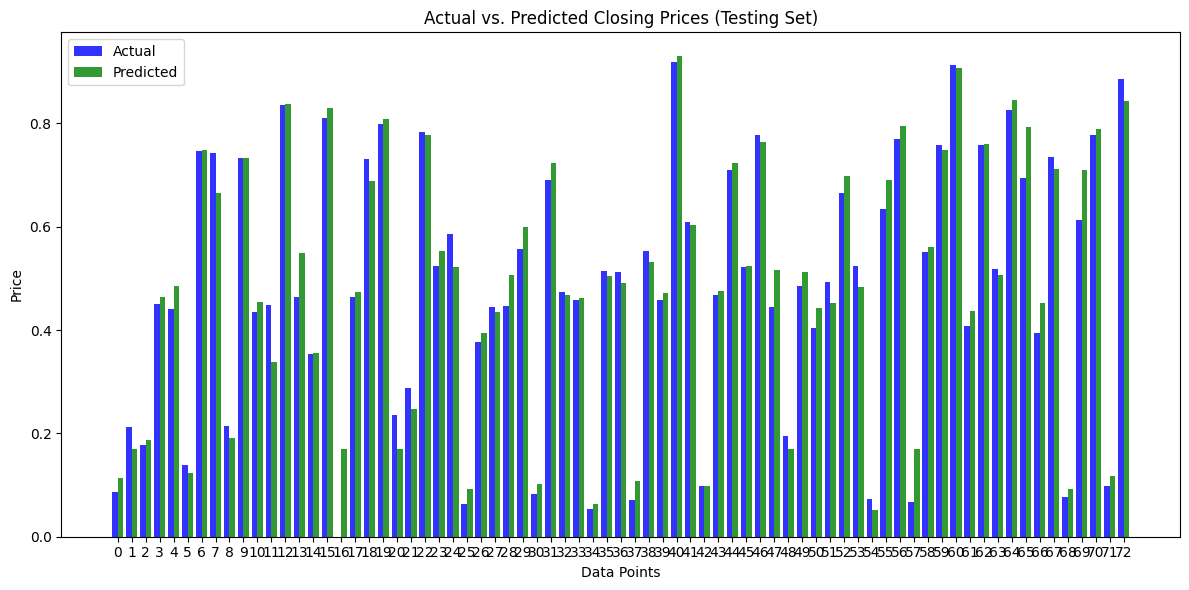

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming btc_data is prepared and includes 'Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff'

def preprocess_data(data):
    # Fill missing values using forward and backward filling
    data.ffill(inplace=True)
    data.bfill(inplace=True)
    
    # Normalize the data
    scaler = MinMaxScaler()
    data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']] = scaler.fit_transform(
        data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    )
    
    return data

def train_evaluate_model(data):
    X = data[['EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    y = data['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = xgb.XGBRegressor(objective='reg:squarederror')
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1]
    }
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Evaluate model performance
    print("Training Results:")
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    print(f"MAE: {mae_train}")
    print(f"R2 Score: {r2_train}")

    print("\nTesting Results:")
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    print(f"MAE: {mae_test}")
    print(f"R2 Score: {r2_test}")

    # Create a bar graph of actual vs. predicted values for testing dataset
    plt.figure(figsize=(12, 6))

    bar_width = 0.4
    index = np.arange(len(y_test))
    opacity = 0.8

    rects1 = plt.bar(index, y_test, bar_width, alpha=opacity, color='b', label='Actual')
    rects2 = plt.bar(index + bar_width, y_pred_test, bar_width, alpha=opacity, color='g', label='Predicted')

    plt.xlabel('Data Points')
    plt.ylabel('Price')
    plt.title('Actual vs. Predicted Closing Prices (Testing Set)')
    plt.xticks(index + bar_width / 2, index)
    plt.legend()

    # Adjust y-axis limits for better visualization
    plt.ylim(min(min(y_test), min(y_pred_test)) * 0.95, max(max(y_test), max(y_pred_test)) * 1.05)

    plt.tight_layout()
    plt.show()

# Assuming btc_data is prepared as in your previous script
btc_data = preprocess_data(btc_data)
train_evaluate_model(btc_data)


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import pandas as pd

# Assuming btc_data is prepared and includes 'Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff'

def preprocess_data(data):
    data.ffill(inplace=True)
    data.bfill(inplace=True)
    scaler = MinMaxScaler()
    data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']] = scaler.fit_transform(
        data[['Close', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    )
    return data

def train_evaluate_model(data):
    X = data[['EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff']]
    y = data['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8)
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)

    # Calculate RMSE for test set
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    
    # Calculate percentage accuracy based on RMSE relative to data range
    data_range = y_test.max() - y_test.min()
    accuracy_percentage = (1 - rmse_test / data_range) * 100
    
    return accuracy_percentage

# Assuming btc_data is prepared as in your previous script
btc_data = preprocess_data(btc_data)
accuracy_percentage = train_evaluate_model(btc_data)

print(f"Accuracy of XGBoost model: {accuracy_percentage:.2f}%")


Accuracy of XGBoost model: 95.17%


/Users/ameyakulkarni/Desktop/College/Placement/Python/pythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
